In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")


In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [5]:
data = pd.read_csv('./samsung.csv') # the data is obtained from https://finance.yahoo.com/quote/005930.KS/history?p=005930.KS
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-18,37040.0,37500.0,36620.0,36940.0,32201.181641,8875400
1,2017-01-19,37720.0,37920.0,37020.0,37480.0,32671.910156,9418900
2,2017-01-20,37120.0,37420.0,36880.0,37200.0,32427.830078,9185000
3,2017-01-23,37200.0,38060.0,37000.0,38060.0,33177.503906,8810400
4,2017-01-24,38120.0,38580.0,37880.0,38160.0,33264.671875,11048750


In [6]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [7]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [8]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

# DNN model (LSTM)

In [9]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

#model.summary()


Metal device set to: Apple M1 Pro


2022-01-19 14:27:26.524855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-19 14:27:26.524983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=100,
    callbacks=my_callbacks)

2022-01-19 14:27:26.728739: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-01-19 14:27:27.402600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:27.625936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:27.699564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:27.786415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/106 [..............................] - ETA: 2:19 - loss: 0.0153

2022-01-19 14:27:27.907343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - ETA: 0s - loss: 0.0016

2022-01-19 14:27:31.431870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:31.500049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:31.554830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 5s 36ms/step - loss: 0.0016 - val_loss: 4.9719e-04
Epoch 2/100
106/106 [==============================] - 3s 30ms/step - loss: 7.3457e-04 - val_loss: 5.0567e-04
Epoch 3/100
106/106 [==============================] - 3s 31ms/step - loss: 5.6066e-04 - val_loss: 2.7529e-04
Epoch 4/100
106/106 [==============================] - 3s 30ms/step - loss: 4.5751e-04 - val_loss: 2.4693e-04
Epoch 5/100
106/106 [==============================] - 3s 30ms/step - loss: 3.9215e-04 - val_loss: 1.7932e-04
Epoch 6/100
106/106 [==============================] - 3s 30ms/step - loss: 3.5965e-04 - val_loss: 1.8945e-04
Epoch 7/100
106/106 [==============================] - 3s 30ms/step - loss: 3.5374e-04 - val_loss: 2.9605e-04


2022-01-19 14:27:51.184431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:51.246112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:27:51.492160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


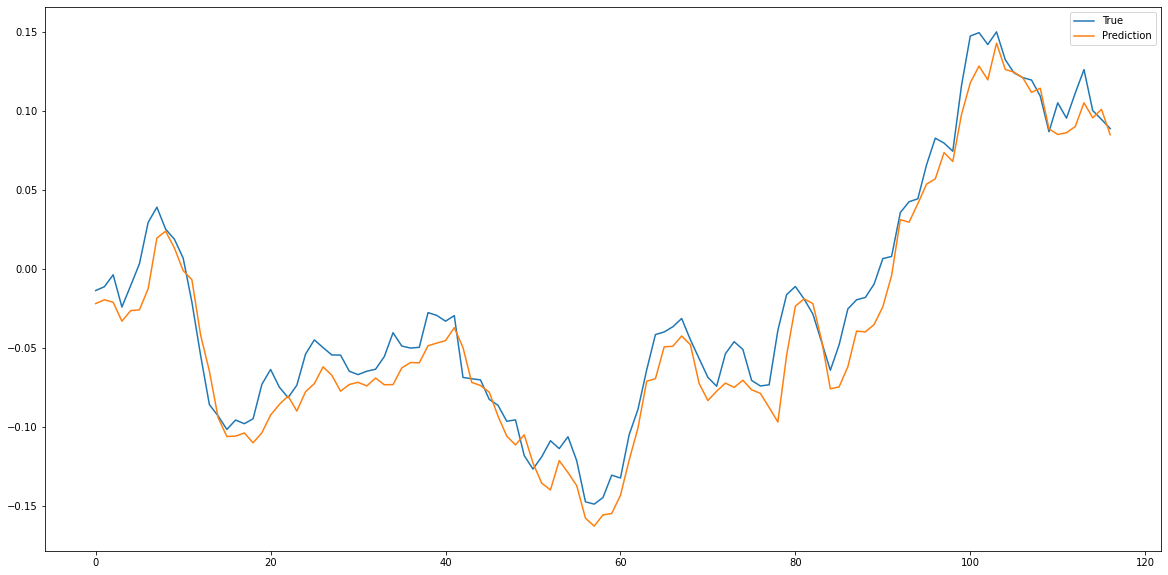

In [11]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()